## Đọc file


In [1]:
import pandas as pd

In [ ]:
df_ = pd.read_excel("Sample_midterm_test_quantitative_FINAL_202.xlsx", engine="openpyxl")
df = df_.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   228 non-null    object 
 1   Company              228 non-null    object 
 2   Sàn                  228 non-null    object 
 3   Year                 228 non-null    int64  
 4   cashratio            228 non-null    float64
 5   ebit                 228 non-null    int64  
 6   quickratio           228 non-null    float64
 7   currentratio         228 non-null    float64
 8   assetturnover        228 non-null    float64
 9   cogs                 228 non-null    int64  
 10  interestexpense      228 non-null    int64  
 11  sellingexp           228 non-null    int64  
 12  adminexp             228 non-null    int64  
 13  taxexpense           228 non-null    int64  
 14  eps                  228 non-null    int64  
 15  dilutedeps           228 non-null    int

In [6]:
df.head()

,ID,Company,Sàn,Year,cashratio,ebit,quickratio,currentratio,assetturnover,cogs,...,currentliabilities,accountspayable,longtermliabilities,totalequity,shareownerequity,retained_earnings,cfo,icf,financingcf,dividendpaid
0,AAT,Tập đoàn Tiên Sơn Thanh Hóa,HOSE,2022,0.07,133300000000,2.01,2.09,0.95,961600000000,...,212700000000,7795000000,109200000000,731500000000,638000000000,89030000000,-238500000000,148000000000,12980000000,0
1,ABR,Đầu tư Nhãn Hiệu Việt,HOSE,2022,0.26,28250000000,0.94,2.38,0.30,104200000000,...,82430000000,54150000000,4598000000,285200000000,200000000000,29390000000,48360000000,-76230000000,0,0
2,ABT,Thủy sản Bến Tre,HOSE,2022,0.86,55440000000,1.15,2.03,1.01,616600000000,...,148100000000,34500000000,3582000000,470900000000,143900000000,61090000000,133800000000,-19250000000,-53850000000,-23270000000
3,ACC,Đầu tư và XD Bình Dương ACC,HOSE,2022,0.13,69230000000,1.12,2.17,0.39,642200000000,...,872300000000,98750000000,11380000000,1216000000000,1050000000000,82330000000,-438800000000,-270100000000,727100000000,-83670000000
4,ACG,Gỗ An Cường,HOSE,2022,0.25,622100000000,0.83,2.49,0.86,4475000000000,...,1542000000000,347500000000,12670000000,3912000000000,1358000000000,615600000000,388400000000,72600000000,-172400000000,-464700000000


<h1> Từ cái file ban đầu, tạo ra cái file chỉ có dữ liệu của Sàn HOSE và cái file chỉ có dữ liệu của sàn HNX</h1>

In [8]:
df_hose = df[df["Sàn"] == "HOSE"]
df_hnx = df[df["Sàn"] == "HNX"]

df_hose.to_csv("HOSE.csv", index=False, encoding="utf-8")
df_hnx.to_csv("HNX.csv", index=False, encoding="utf-8")

dữ liệu của sàn HOSE lưu vào file HOSE.csv <br>
dữ liệu của sàn HNX lưu vào file HNX.csv



Chỉ lấy các cột cần thiết để tính toán

In [11]:
df_hose_selected = df_hose[["ID", "Company", "Sàn", "Year", "ebit", "dividendpaid"]]

df_hose_selected.to_csv("analysis_HOSE.csv", index=False, encoding="utf-8")

In [12]:
df_hose_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132 entries, 0 to 225
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            132 non-null    object
 1   Company       132 non-null    object
 2   Sàn           132 non-null    object
 3   Year          132 non-null    int64 
 4   ebit          132 non-null    int64 
 5   dividendpaid  132 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 7.2+ KB


<h1>Đã có HOSE</h1>

## Linear Regression 

df_hose_selectef là biến chứa dữ liệu cần tính


<ul>
    <li><strong>ID</strong>:
        <ul>
            <li>Đây là mã nhận dạng duy nhất cho từng công ty trong dữ liệu.</li>
            <li>Loại dữ liệu: <code>object</code> (có thể là chuỗi ký tự hoặc số nhưng được lưu dưới dạng chuỗi).</li>
            <li><strong>Ý nghĩa</strong>: Dùng để xác định từng công ty trong tập dữ liệu và tránh trùng lặp giữa các công ty.</li>
        </ul>
    </li>
    <li><strong>Company</strong>:
        <ul>
            <li>Tên của công ty.</li>
            <li>Loại dữ liệu: <code>object</code>.</li>
            <li><strong>Ý nghĩa</strong>: Cho biết tên của công ty, giúp nhận dạng dễ dàng hơn khi phân tích.</li>
        </ul>
    </li>
    <li><strong>Sàn</strong>:
        <ul>
            <li>Sàn giao dịch mà công ty đang được niêm yết, ví dụ: "HOSE" (Sở Giao dịch Chứng khoán TP.HCM).</li>
            <li>Loại dữ liệu: <code>object</code>.</li>
            <li><strong>Ý nghĩa</strong>: Xác định thị trường hoặc sàn giao dịch chứng khoán mà công ty niêm yết. Việc này quan trọng khi so sánh các công ty trên cùng sàn hoặc giữa các sàn khác nhau.</li>
        </ul>
    </li>
    <li><strong>Year</strong>:
        <ul>
            <li>Năm của dữ liệu tài chính được ghi nhận.</li>
            <li>Loại dữ liệu: <code>int64</code>.</li>
            <li><strong>Ý nghĩa</strong>: Cho biết thời điểm (theo năm) của các chỉ số tài chính, giúp theo dõi và phân tích xu hướng theo thời gian.</li>
        </ul>
    </li>
    <li><strong>ebit</strong> (Earnings Before Interest and Taxes):
        <ul>
            <li>Lợi nhuận trước lãi vay và thuế.</li>
            <li>Loại dữ liệu: <code>int64</code>.</li>
            <li><strong>Ý nghĩa</strong>: Đây là một thước đo về hiệu quả hoạt động của công ty, cho biết công ty tạo ra bao nhiêu lợi nhuận từ hoạt động kinh doanh trước khi tính các chi phí lãi vay và thuế.</li>
        </ul>
    </li>
    <li><strong>dividendpaid</strong>:
        <ul>
            <li>Số tiền cổ tức đã chi trả cho cổ đông.</li>
            <li>Loại dữ liệu: <code>int64</code>.</li>
            <li><strong>Ý nghĩa</strong>: Cho thấy công ty đã phân phối bao nhiêu lợi nhuận cho cổ đông, phản ánh chính sách cổ tức và khả năng tạo lợi nhuận của công ty.</li>
        </ul>
    </li>
</ul>


In [14]:
statistics = df_hose_selected[["ebit", "dividendpaid"]].describe()
print(statistics)

               ebit  dividendpaid
count  1.320000e+02  1.320000e+02
mean   2.730072e+11 -1.326273e+11
std    1.293363e+12  4.112056e+11
min   -1.063000e+13 -3.382000e+12
25%    2.445000e+10 -7.383500e+10
50%    8.441000e+10 -1.037500e+10
75%    3.421750e+11  0.000000e+00
max    6.795000e+12  4.612050e+05


Giải thích các thông số thống kê cho `ebit` và `dividendpaid`

- **count**: Số lượng mẫu (132 mẫu) trong cả hai cột `ebit` và `dividendpaid`. Điều này có nghĩa là có 132 giá trị hợp lệ trong mỗi cột.

- **mean**: Giá trị trung bình.
  - **ebit**: Trung bình lợi nhuận trước lãi vay và thuế là khoảng 2.73 * 10¹¹ (273 tỷ).
  - **dividendpaid**: Trung bình số tiền cổ tức chi trả là khoảng -1.33 * 10¹¹ (âm 132 tỷ). Số âm có thể chỉ ra rằng công ty đã trả ít hơn hoặc đã có các khoản chi khác làm giảm giá trị này.

- **std**: Độ lệch chuẩn (standard deviation).
  - **ebit**: 1.29 * 10¹² cho thấy lợi nhuận có sự phân tán cao quanh giá trị trung bình, phản ánh sự biến động lớn giữa các công ty.
  - **dividendpaid**: 4.11 * 10¹¹ cũng có độ lệch chuẩn cao, cho thấy sự biến động lớn trong số tiền cổ tức chi trả.

- **min**: Giá trị nhỏ nhất trong mỗi cột.
  - **ebit**: -1.063 * 10¹³, chỉ ra giá trị thấp nhất (âm) trong lợi nhuận trước lãi vay và thuế.
  - **dividendpaid**: -3.38 * 10¹², chỉ ra giá trị âm lớn nhất ở cột cổ tức, cho thấy có thể một công ty chịu lỗ hoặc có chi phí lớn liên quan đến cổ tức.

- **25% (Q1)**: Phân vị thứ nhất, chỉ ra rằng 25% giá trị trong mỗi cột là nhỏ hơn hoặc bằng giá trị này.
  - **ebit**: 2.445 * 10¹⁰.
  - **dividendpaid**: -7.38 * 10¹⁰.

- **50% (Median)**: Phân vị thứ hai hoặc giá trị trung vị.
  - **ebit**: 8.441 * 10¹⁰, là mức lợi nhuận trung bình của các công ty.
  - **dividendpaid**: -1.037 * 10¹⁰, là mức chi trả cổ tức trung bình, cũng là âm.

- **75% (Q3)**: Phân vị thứ ba, chỉ ra rằng 75% giá trị trong mỗi cột là nhỏ hơn hoặc bằng giá trị này.
  - **ebit**: 3.42 * 10¹¹.
  - **dividendpaid**: 0, có nghĩa là 75% giá trị cổ tức nằm ở mức không chi trả hoặc có chi trả không đáng kể.

- **max**: Giá trị lớn nhất trong mỗi cột.
  - **ebit**: 6.795 * 10¹², chỉ ra lợi nhuận cao nhất trước lãi vay và thuế của một công ty.
  - **dividendpaid**: 4.612 * 10⁵, là mức cao nhất của cổ tức được chi trả.

Những thông số này cho thấy bức tranh tổng quan về phân phối dữ liệu của `ebit` và `dividendpaid`. Giá trị âm trong `dividendpaid` có thể là do một số công ty chịu lỗ hoặc không chi trả cổ tức.


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


<h1>Tính toán dự đoán ebit từ dividendpaid</h1>

In [39]:
# Chọn cột ebit và dividendpaid để làm hồi quy tuyến tính
X = df_hose_selected[["dividendpaid"]]  # Dữ liệu đầu vào (biến độc lập)
y = df_hose_selected["ebit"]            # Dữ liệu đầu ra (biến phụ thuộc)

model = LinearRegression()
model.fit(X, y)

LinearRegression()

<h1>Biểu đồ hồi quy</h1>

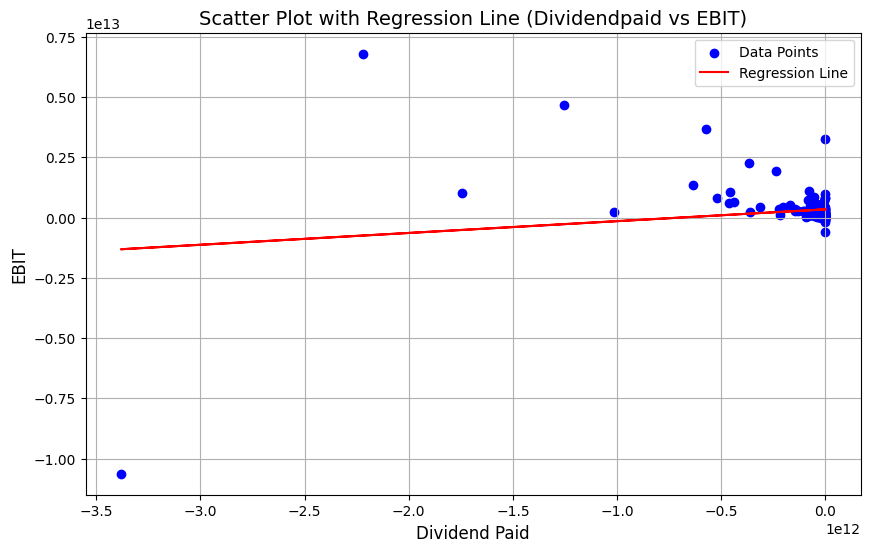

In [41]:
# Dự đoán giá trị ebit từ dividendpaid
y_pred = model.predict(X)

# Vẽ biểu đồ scatter và đường hồi quy
plt.figure(figsize=(10, 6))

# Biểu đồ scatter
plt.scatter(X, y, color='blue', label='Data Points')

# Vẽ đường hồi quy
plt.plot(X, y_pred, color='red', label='Regression Line')

# Thêm tiêu đề và nhãn trục
plt.title('Scatter Plot with Regression Line (Dividendpaid vs EBIT)', fontsize=14)
plt.xlabel('Dividend Paid', fontsize=12)
plt.ylabel('EBIT', fontsize=12)

# Thêm lưới và hiển thị trục
plt.grid(True)
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [ ]:
# Tính toán dự đoán ebit từ dividendpaid
df_hose_selected.loc[:, "LR ebit"] = model.predict(X)

<h1>Tính toán dự đoán dividendpaid từ ebit</h1>

In [42]:
# Chọn cột ebit và dividendpaid để làm hồi quy tuyến tính
X = df_hose_selected[["ebit"]]  # Dữ liệu đầu vào (biến độc lập) là 'ebit'
y = df_hose_selected["dividendpaid"]  # Dữ liệu đầu ra (biến phụ thuộc) là 'dividendpaid'

In [43]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

<h1>Biểu đồ hồi quy </h1>

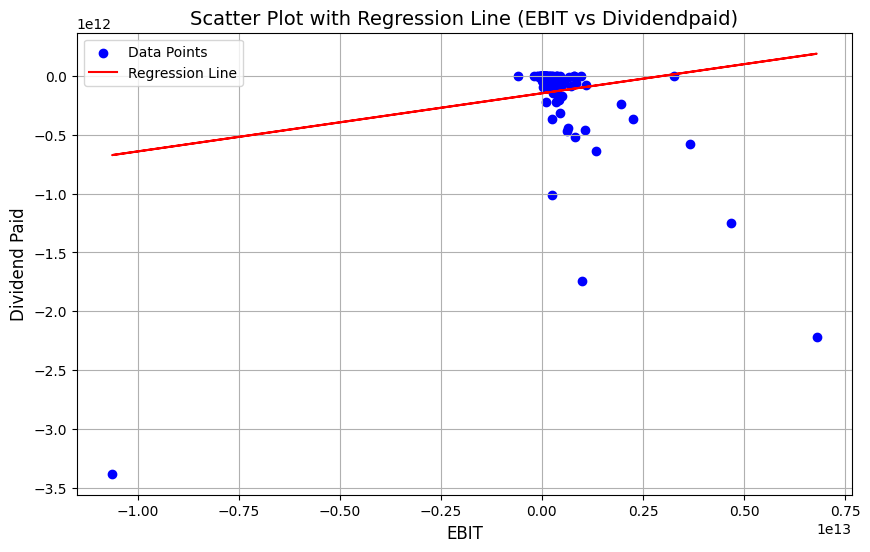

In [44]:
y_pred = model.predict(X)

# Vẽ biểu đồ scatter và đường hồi quy
plt.figure(figsize=(10, 6))

# Biểu đồ scatter
plt.scatter(X, y, color='blue', label='Data Points')

# Vẽ đường hồi quy
plt.plot(X, y_pred, color='red', label='Regression Line')

# Thêm tiêu đề và nhãn trục
plt.title('Scatter Plot with Regression Line (EBIT vs Dividendpaid)', fontsize=14)
plt.xlabel('EBIT', fontsize=12)
plt.ylabel('Dividend Paid', fontsize=12)

# Thêm lưới và hiển thị trục
plt.grid(True)
plt.legend()

# Hiển thị biểu đồ
plt.show()

<span>Kết Luận Tính toán dự đoán dividendpaid từ ebit </span>
Các điểm gần và xa đường hồi quy

*   **Các điểm gần đường hồi quy**:
    *   Điều này cho thấy mô hình hồi quy tuyến tính có thể giải thích khá tốt mối quan hệ giữa `ebit` và `dividendpaid` cho phần lớn các quan sát.
    *   Khi các điểm nằm gần đường hồi quy, điều này đồng nghĩa với việc dự đoán của mô hình (đường hồi quy) gần với giá trị thực tế (các điểm dữ liệu), tức là sai số nhỏ.

*   **Các điểm xa đường hồi quy**:
    *   Các điểm này gọi là **outliers** (dữ liệu ngoại lai) hoặc **influential points** (điểm có ảnh hưởng mạnh). Đây là các điểm mà mô hình không thể giải thích tốt bằng hồi quy tuyến tính.
    *   Khi một hoặc vài điểm nằm xa đường hồi quy, điều này có thể cho thấy rằng mối quan hệ giữa các biến không hoàn toàn là tuyến tính hoặc có những yếu tố khác chưa được xem xét trong mô hình.
    *   Những điểm này có thể làm giảm độ chính xác của mô hình và ảnh hưởng đến dự đoán chung, đặc biệt nếu mô hình không được điều chỉnh để xử lý ngoại lệ.



In [29]:
df_hose_selected.loc[:, "LR div"] = model.predict(X)

In [33]:
df_hose_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132 entries, 0 to 225
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            132 non-null    object 
 1   Company       132 non-null    object 
 2   Sàn           132 non-null    object 
 3   Year          132 non-null    int64  
 4   ebit          132 non-null    int64  
 5   dividendpaid  132 non-null    int64  
 6   LR ebit       132 non-null    float64
 7   LR div        132 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 9.3+ KB


In [34]:
# Lưu DataFrame df_hose_selected vào file CSV
df_hose_selected.to_csv('final_hose.csv', index=False)
